<a href="https://colab.research.google.com/github/ika-si/AI-Fri45/blob/main/search_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pythonで迷路（＝グラフ）探索アルゴリズムを実装する

## 1. 深さ優先探索編

### 1-0. Google Colab のファイルを手元にコピーする
- この文を読めている時点でアクセスには成功している。
- 自身のGoogleドライブ上の好きな場所にこのファイルのコピーを作成しよう。
- 自身のローカルで実行していっても良いが、基本的にはGoogle Colabで進めることを想定している。

### 1-1. 深さ優先探索（DFS; Depth First Search）の関数と前準備
- 以下のコードは、これまでで用意したグラフ上でいよいよ探索を始めるための関数である。
  - 今の状態で一旦実行させてみよう。次のような出力が得られるはずだ。
```
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
```
  - しかしながら、コードのコメントをみればわかるように、2つ目の出力では最初のノードを訪問済みにしたい。つまり、スタートするノードである0番目のノードではvisitedをTrueにしたい。
```
[False, False, False, False, False, False, False, False, False, False]
[True, False, False, False, False, False, False, False, False, False]
```
- **「1-1.で完成させる行」に何を入れるべきか考えて、実際に上記の出力が得られるようにしよう。うまく行ったら次のステップへ。**

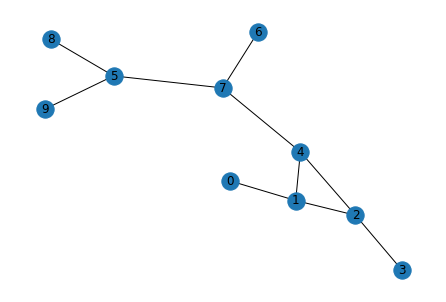

[False, False, False, False, False, False, False, False, False, False]
[True, False, False, False, False, False, False, False, False, False]


In [4]:
from collections import defaultdict 
import matplotlib.pyplot as plt
import networkx as nx

# 迷路をグラフとして保持するクラス
class Graph: 
  
    # コンストラクタ（クラスを初期化する） 
    def __init__(self): 
  
        # pythonのcollectionsから辞書型の変数を宣言し、このクラスのメンバ変数として定義
        self.graph = defaultdict(list) 
  
    # u番目のノードとv番目のノードの間に双方向のエッジを張る
    def addEdge(self, u, v): 
        self.graph[u].append(v) 
        self.graph[v].append(u) 

    # Depth First Search (深さ優先探索) でoriginノードからdestinationノードまで探索 
    def DFS(self, o, d): 
  
        # ノードそれぞれを訪問したことがあるかを示すリスト
        # 最初は全て訪問したことがないので False のみ 
        visited = [False] * (len(self.graph)) 
        print(visited)
  
        # オープンリスト
        queue = [] 
  
        # オープンリストの要素第1号としてスタート地点を追加
        queue.append(o) 
        # スタート地点を訪問済みにする
        visited[o] = True# 1-1.で完成させる行
        print(visited)  
  
if __name__ == "__main__":
  
    # グラフを作成する
    # 講義で表示されているとおりのグラフをここで作成する 
    # (Sを0、Gを9とし、その他のノードは番号通り1から8までとする)
    g = Graph() 
    g.addEdge(0, 1)
    g.addEdge(1, 4)
    g.addEdge(1, 2)
    g.addEdge(2, 3)
    g.addEdge(2, 4)
    g.addEdge(4, 7)
    g.addEdge(7, 6)
    g.addEdge(7, 5)
    g.addEdge(5, 8)
    g.addEdge(5, 9)

    # グラフの図示にはnetworkxを用いる
    # 上記で作成したGraphクラスのインスタンスにあるメンバ変数のgraphをnetworkxのグラフ表現に変換して表示
    nx.draw(nx.convert.to_networkx_graph(g.graph), with_labels=True)
    plt.show()

    # 深さ優先探索の実行
    g.DFS(0,9)


### 1-2. DFSを完成させよう（1/2）
- いよいよ探索の部分の実装に入っていく。
  - 実装時には、デバッギングしながら少しずつコードを足していく。
    - いきなりたくさん行を足して実行して動かなかった場合、どの行が原因か分かりにくくなるので、足すのは少しずつ。
    - デバッギングする手段として一番お手軽なのが、変数をprintで標準出力していく方法である。
    - デバッガと呼ばれる専用のツール群を使った方がより多角的にデバッギングできるが、printでのデバッグもお手軽な方法として有用である。
    - ここではsubqueueとvisitedという変数を例に、実装の進め方を体験してみよう。
  - とりあえず実行してみよう。最後の2行が次のように表示されるはずだ。
```
0 []
[True, False, False, False, False, False, False, False, False, False]
```
    - 👆の1行目の"0"はprint (s, end = " ")の出力（今回はあまり関係ない）。
    - 👆の1行目の"[]"はprint(subqueue)の出力で、今取り出したノードsから遷移可能でまだ訪れていないノードが表示される予定である。
      - 本来であれば変数sがノード0なので、隣接しているノード1がsubqueueに格納されていて欲しい。
    - 👆の2行目の""はprint(visited)の出力で、各ノードに訪れたことがある場合はTrue、そうでなければFalseが格納されている予定である。
      - ノード1がsubqueueに格納されるので、ノード0だけでなくノード1に対応する要素もTrueになっていて欲しい。
  - 下のコードで3行コメントアウトされている部分がある。
```
# if visited[i] == False:
#     subqueue# 1-2.で完成させる行 (ヒント: subqueueにiを「加える」)
#     visited[i] # 1-2.で完成させる行
```
  - **ここの先頭のコメント命令をそれぞれ削除し、2つの「1-2.で完成させる行」に何を入れるべきか考えて、実際に次の出力が得られるようにしよう。うまく行ったら次のステップへ。**
```
0 [1]
[True, True, False, False, False, False, False, False, False, False]
```

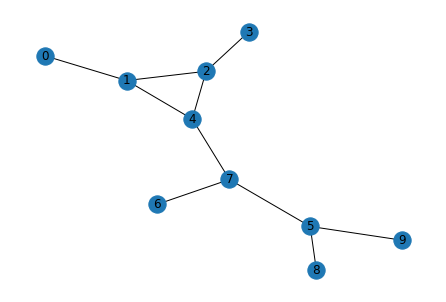

Following is Depth First Traversal (starting from vertex 0)
0 [1]
[True, True, False, False, False, False, False, False, False, False]


In [25]:
from collections import defaultdict 
import matplotlib.pyplot as plt
import networkx as nx

# 迷路をグラフとして保持するクラス
class Graph: 
  
    # コンストラクタ（クラスを初期化する） 
    def __init__(self): 
  
        # pythonのcollectionsから辞書型の変数を宣言し、このクラスのメンバ変数として定義
        self.graph = defaultdict(list) 
  
    # u番目のノードとv番目のノードの間に双方向のエッジを張る
    def addEdge(self, u, v): 
        self.graph[u].append(v) 
        self.graph[v].append(u) 

    # Depth First Search (深さ優先探索) でoriginノードからdestinationノードまで探索 
    def DFS(self, o, d): 
  
        # ノードそれぞれを訪問したことがあるかを示すリスト
        # 最初は全て訪問したことがないので False のみ 
        visited = [False] * (len(self.graph)) 
  
        # オープンリスト
        queue = [] 
  
        # オープンリストの要素第1号としてスタート地点を追加
        queue.append(o) 
        # スタート地点を訪問済みにする
        visited[o] = True# 1-1.で完成させる行

        # queueが空でない限りループ  
        while queue: 
  
            # オープンリストの先頭のノードを抜き出す
            s = queue.pop(0) 
            # クローズドリストに追加する代わりに辿った順序を出力していく
            print (s, end = " ") 
            # 目的地を出力した時点で終了
            if s == d:
                print ("\n")
                return
  
            # 👆で抜き出されたノードから繋がっているノードを調べていく
            subqueue = []
            for i in self.graph[s]: 
                # まだ訪れたことの無いノードをサブのオープンリストに追加
                # オープンリストに加えた時点で訪問済みとする
                if visited[i] == False:
                    subqueue.append(i)# 1-2.で完成させる行 (ヒント: subqueueにiを「加える」)
                    visited[i] = True# 1-2.で完成させる行
                print(subqueue)
                print(visited)

if __name__ == "__main__":
  
    # グラフを作成する
    # 講義で表示されているとおりのグラフをここで作成する 
    # (Sを0、Gを9とし、その他のノードは番号通り1から8までとする)
    g = Graph() 
    g.addEdge(0, 1)
    g.addEdge(1, 4)
    g.addEdge(1, 2)
    g.addEdge(2, 3)
    g.addEdge(2, 4)
    g.addEdge(4, 7)
    g.addEdge(7, 6)
    g.addEdge(7, 5)
    g.addEdge(5, 8)
    g.addEdge(5, 9)

    # グラフの図示にはnetworkxを用いる
    # 上記で作成したGraphクラスのインスタンスにあるメンバ変数のgraphをnetworkxのグラフ表現に変換して表示
    nx.draw(nx.convert.to_networkx_graph(g.graph), with_labels=True)
    plt.show()

    # 深さ優先探索の実行
    print ("Following is Depth First Traversal (starting from vertex 0)") 
    g.DFS(0,9)


### 1-3. DFSを完成させよう（2/2）
- ここまできたらあと少しでDFSが完成する。
- **1. 深さ優先探索編 の最終課題：DFSを完成させて実行してみよう。**
  - 「1-3.で何かを埋める行」の1行を埋めるとDFSで探索できるようになり、講義時に結果として紹介した通りのリストが訪問したノードとして標準出力される。
  - ただし、講義では右から順番に訪問したリストとなっていて、この演習では逆に左から順番に並んでいる点に注意しよう。
  - 直前の行の「xxxx」に入る日本語を講義を思い出しながら考えてみて、「1-3.で何かを埋める行」を完成させてみよう。
- **実行結果として、深さ優先探索で訪問したリストの順序が講義での例と同じになったらTAに見せること（誰か1名でよい）。TAから2.幅優先探索編のURLを案内される。**

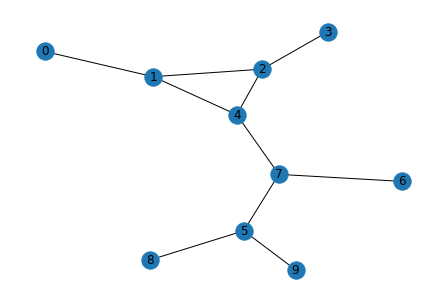

Following is Depth First Traversal (starting from vertex 0)
0 1 4 7 6 

In [26]:
from collections import defaultdict 
import matplotlib.pyplot as plt
import networkx as nx

# 迷路をグラフとして保持するクラス
class Graph: 
  
    # コンストラクタ（クラスを初期化する） 
    def __init__(self): 
  
        # pythonのcollectionsから辞書型の変数を宣言し、このクラスのメンバ変数として定義
        self.graph = defaultdict(list) 
  
    # u番目のノードとv番目のノードの間に双方向のエッジを張る
    def addEdge(self, u, v): 
        self.graph[u].append(v) 
        self.graph[v].append(u) 

    # Depth First Search (深さ優先探索) でoriginノードからdestinationノードまで探索 
    def DFS(self, o, d): 
  
        # ノードそれぞれを訪問したことがあるかを示すリスト
        # 最初は全て訪問したことがないので False のみ 
        visited = [False] * (len(self.graph)) 
  
        # オープンリスト
        queue = [] 
  
        # オープンリストの要素第1号としてスタート地点を追加
        queue.append(o) 
        # スタート地点を訪問済みにする
        visited[o] = True# 1-1.で完成させる行

        # queueが空でない限りループ  
        while queue: 
  
            # オープンリストの先頭のノードを抜き出す
            s = queue.pop(0) 
            # クローズドリストに追加する代わりに辿った順序を出力していく
            print (s, end = " ") 
            # 目的地を出力した時点で終了
            if s == d:
                print ("\n")
                return
  
            # 👆で抜き出されたノードから繋がっているノードを調べていく
            subqueue = []
            for i in self.graph[s]: 
                # まだ訪れたことの無いノードをサブのオープンリストに追加
                # オープンリストに加えた時点で訪問済みとする
                if visited[i] == False:
                    subqueue.append(i)# 1-2.で完成させる行 (ヒント: subqueueにiを「加える」)
                    visited[i] = True# 1-2.で完成させる行
            # サブのオープンリストを本体のオープンリストの「xxxx」に追加
            #--------- 1-3.で何かを埋める行 ---------# 
            if subqueue:
              sub = subqueue.pop(0)
              queue.append(sub)

if __name__ == "__main__":
  
    # グラフを作成する
    # 講義で表示されているとおりのグラフをここで作成する 
    # (Sを0、Gを9とし、その他のノードは番号通り1から8までとする)
    g = Graph() 
    g.addEdge(0, 1)
    g.addEdge(1, 4)
    g.addEdge(1, 2)
    g.addEdge(2, 3)
    g.addEdge(2, 4)
    g.addEdge(4, 7)
    g.addEdge(7, 6)
    g.addEdge(7, 5)
    g.addEdge(5, 8)
    g.addEdge(5, 9)

    # グラフの図示にはnetworkxを用いる
    # 上記で作成したGraphクラスのインスタンスにあるメンバ変数のgraphをnetworkxのグラフ表現に変換して表示
    nx.draw(nx.convert.to_networkx_graph(g.graph), with_labels=True)
    plt.show()

    # 深さ優先探索の実行
    print ("Following is Depth First Traversal (starting from vertex 0)") 
    g.DFS(0,9)
